# エネルギー消費量に関する可視化

In [1]:
# データ分析に必要なライブラリ
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
%matplotlib inline
# 下記の一文を入れることで、matplotlibに日本語を表示できる
"""
IPAPGothic:適宜日本語が格納されているフォントに変更すること
"""
plt.rcParams['font.family'] = 'IPAPGothic'

In [2]:
# データ確認
"""
データに関して
Github上にあるデータは、1時間毎に区切られた積算及び計測データです。
2017年度のデータを使用しています。
"""

#vis_dfにcsvファイルを読み込みます。
"""
index_col:csvファイルの何列目にindexがあるか指定
engine:pythonを指定することで日本語ヘッダを文字化けせずに読み込める
parse_dates:datetime型で読み込む列を指定（[]をつけて、列番号で指定）
header:ヘッダが何行目にあるか
skiprows:読み込む際に読み飛ばす行を指定（[]をつけて、特定の行のみ除外するように指定)

"""
vis_df = pd.read_csv(r'use_data/energy_data.csv',
                     index_col=0,
                     engine='python',
                     parse_dates=[0],
                     header=0,
                     skiprows=[1],
                    )
#vis_df.index.freq = 'H'

In [3]:
#読み込んだデータの情報を出力
vis_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2017-04-01 00:00:00 to 2018-03-31 23:00:00
Data columns (total 10 columns):
ガス量       8760 non-null float64
受電 電力量    8760 non-null int64
ガス量用途A    8760 non-null float64
ガス量用途B    8760 non-null float64
ガス量用途C    8760 non-null float64
電力量用途A    8760 non-null float64
電力量用途B    8760 non-null float64
電力量用途C    8760 non-null float64
電力量用途D    8760 non-null float64
外気温       8760 non-null float64
dtypes: float64(9), int64(1)
memory usage: 752.8 KB


In [4]:
# 読み込んだデータの上から5行+ヘッダ情報の出力
vis_df.head()

,ガス量,受電 電力量,ガス量用途A,ガス量用途B,ガス量用途C,電力量用途A,電力量用途B,電力量用途C,電力量用途D,外気温
ポイント名,,,,,,,,,,
2017-04-01 00:00:00,1.0,89,0.166667,0.333333,0.5,0.1,0.2,0.3,0.4,5.8
2017-04-01 01:00:00,2.0,85,0.333333,0.666667,1.0,0.2,0.4,0.6,0.8,5.7
2017-04-01 02:00:00,5.0,81,0.833333,1.666667,2.5,0.5,1.0,1.5,2.0,5.8
2017-04-01 03:00:00,1.0,94,0.166667,0.333333,0.5,0.1,0.2,0.3,0.4,5.9
2017-04-01 04:00:00,2.0,73,0.333333,0.666667,1.0,0.2,0.4,0.6,0.8,5.9


## ガス消費量

## 月別で可視化

In [5]:
# 月別データにリサンプリングする。
# ガス量は計量値なので月毎の合計値で可視化する。
"""
resample('M').sum():vis_dfを1ヶ月('M')毎に合計（sum())する。
resample('M').mean():vis_dfを1ヶ月('M')毎に平均（sum())する。
"""
vis_df_month = vis_df.resample('M').sum()
vis_df_month['外気温'] = vis_df['外気温'].resample('M').mean()
# 日付のタイムスタンプを yyyy/mm/dd hh:mm:ss から　yyyy/mmに変更
vis_df_month.index = vis_df_month.index.strftime('%Y/%m')

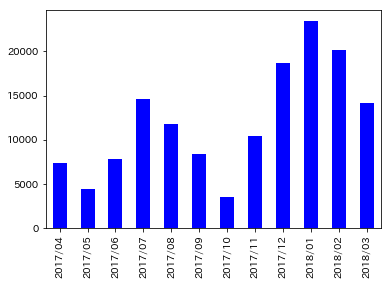

In [6]:
# 可視化（pandasを利用した場合）
"""
['ガス量']：可視化したい列の名称（ヘッダ）
kind='bar':棒グラフで表現
colormap='bwr':色の選択
"""
vis_df_month['ガス量'].plot(kind='bar',colormap='bwr')

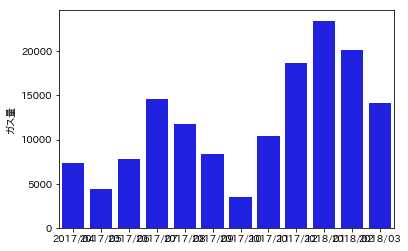

In [7]:
# 可視化（seabornを利用した場合）
"""
x=vis_df_month.index:pandasデータフレームのindex(x軸)
y = vis_df_month['ガス量']:可視化したい列の名称
color='blue'：色の選択
"""
sns.barplot(x=vis_df_month.index,y = vis_df_month['ガス量'],color='blue')

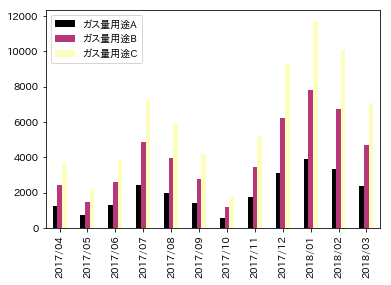

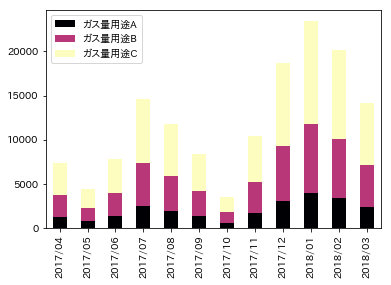

In [8]:
# 可視化（pandasを利用した場合）
'''
vis_df_month.columns.str.startswith('ガス量用途')の文言は、
ヘッダ行を検索して、先頭文字列にシングルクォートで囲まれた文字列が含まれているものを
選択する処理を行っている。
'''
vis_df_month.loc[:,vis_df_month.columns.str.startswith('ガス量用途')].plot(kind='bar',colormap='magma')

# 積み重ねる場合
'''
stacked: Trueにすると積み重ねることができる。
'''
vis_df_month.loc[:,vis_df_month.columns.str.startswith('ガス量用途')].plot(stacked=True,kind='bar',colormap='magma')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C09898E668>,
      dtype=object)

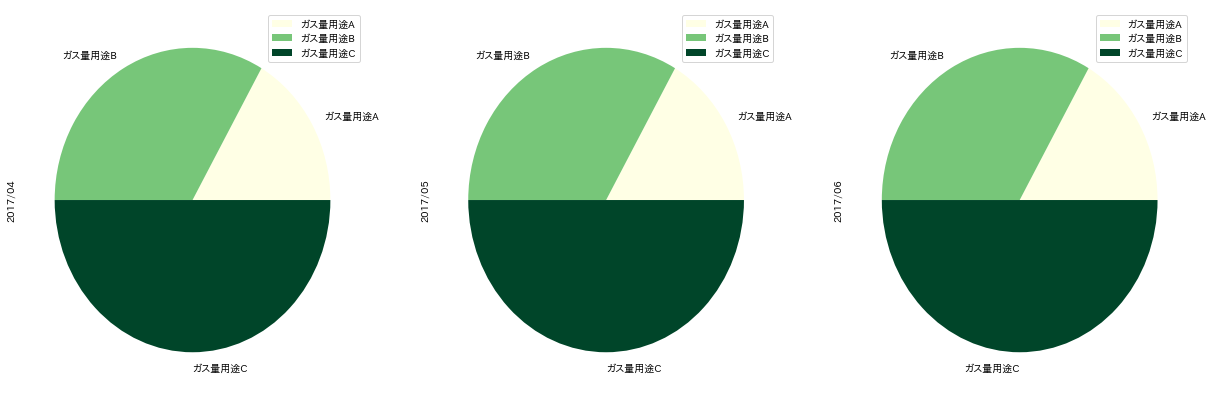

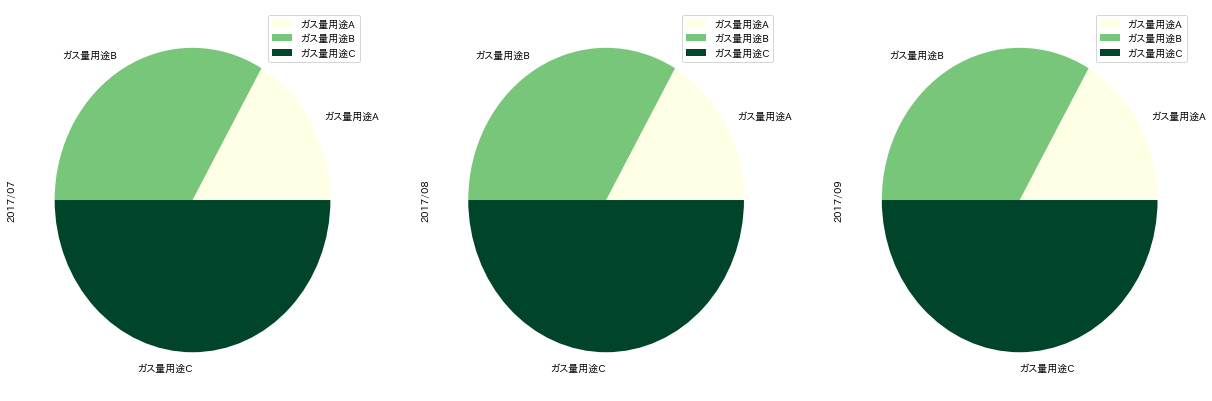

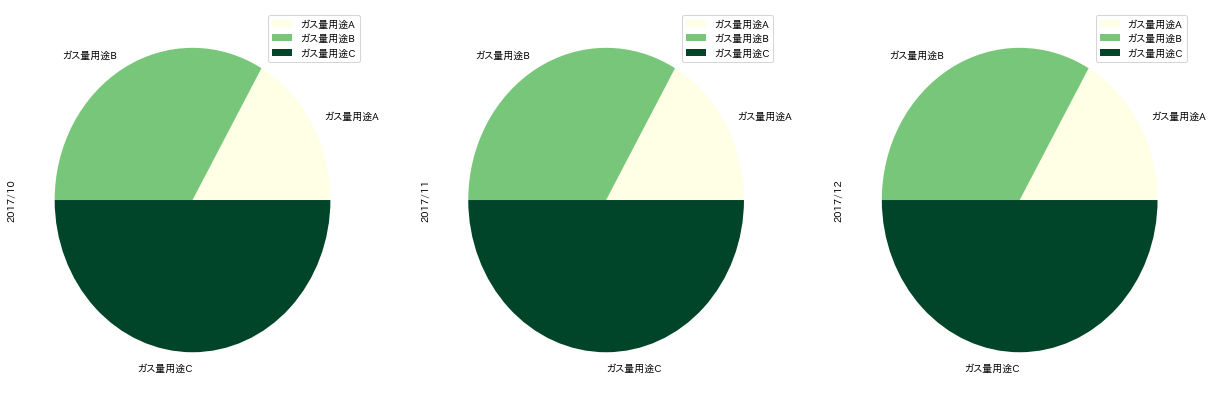

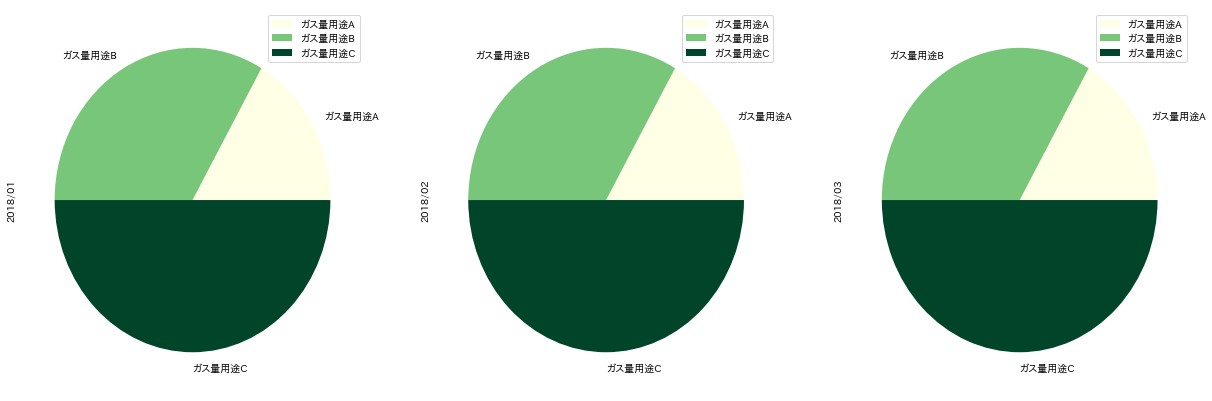

In [9]:
# 可視化（pandasを利用した場合）
'''
Pieチャートで月毎の利用用途の可視化
4行書いたのは見栄えのため。良い方法ある？
loc[]:可視化に必要な範囲（日付指定）
.columns.str.startswith('ガス量用途'):「ガス量用途」を先頭一致でヘッダから検索し、一致したものを可視化
'''
vis_df_month.loc['2017/04':'2017/06',vis_df_month.columns.str.startswith('ガス量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='YlGn')
vis_df_month.loc['2017/07':'2017/09',vis_df_month.columns.str.startswith('ガス量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='YlGn')
vis_df_month.loc['2017/10':'2017/12',vis_df_month.columns.str.startswith('ガス量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='YlGn')
vis_df_month.loc['2018/01':'2018/03',vis_df_month.columns.str.startswith('ガス量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='YlGn')

C:\Users\yuuki\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\yuuki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\yuuki\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


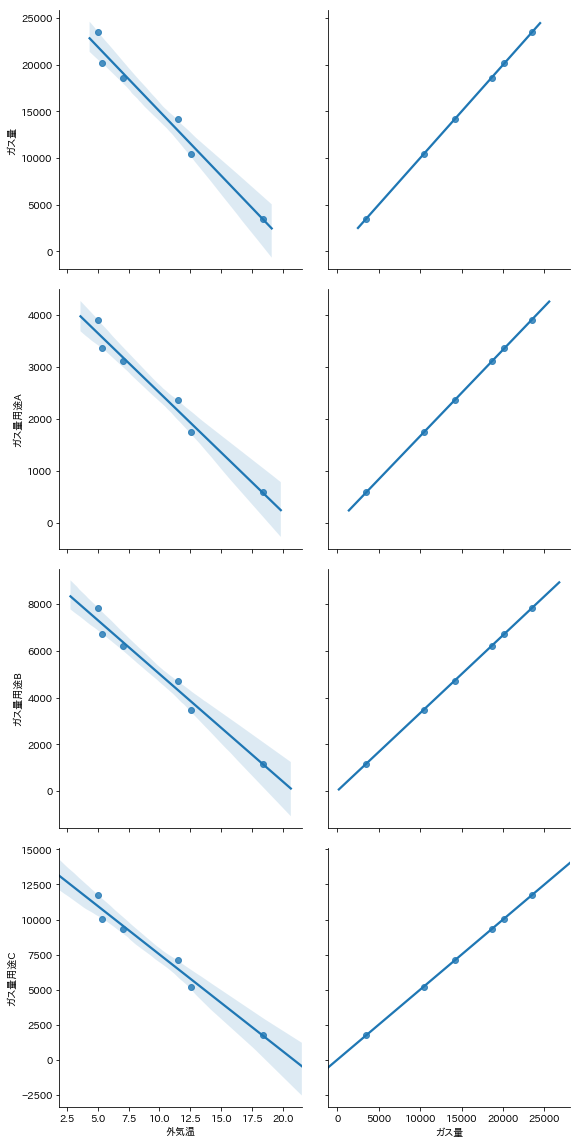

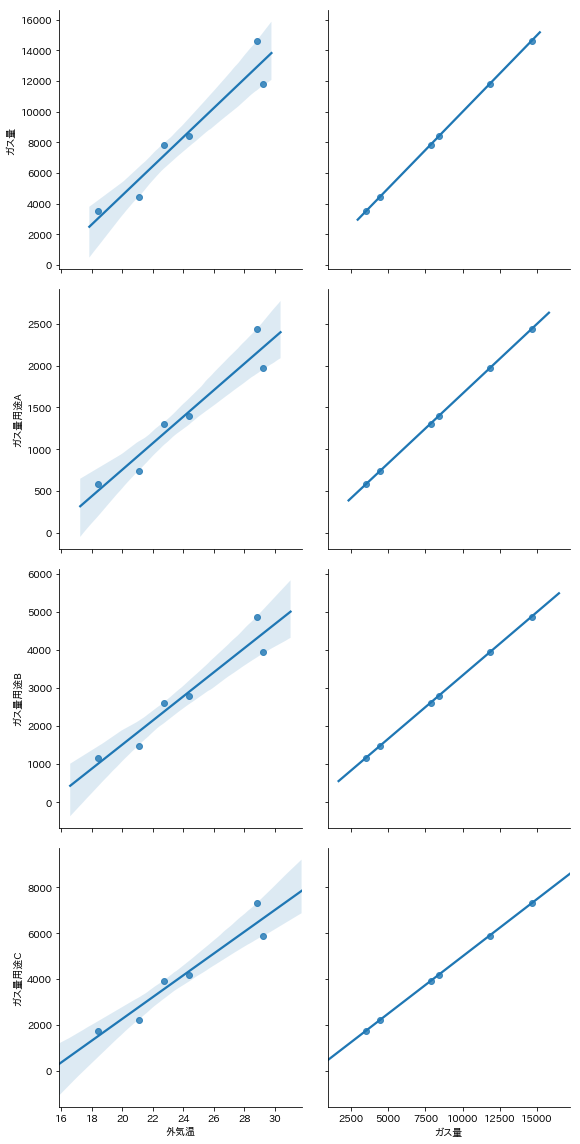

In [10]:
# 外気温度に対する電力量の相関,受電電力量に対する各用途の相関の確認
"""
 x_vars=['外気温','ガス量']：x軸にする列を指定
 y_vars=vis_df_month.columns[vis_df_month.columns.str.startswith('ガス量')]：y軸にする列を指定

"""
sns.pairplot(vis_df_month['2017/10':'2018/03'],
             x_vars=['外気温','ガス量'],
             y_vars=vis_df_month.columns[vis_df_month.columns.str.startswith('ガス量')],
             kind = 'reg',
             size = 4,
            )
# 外気温度に対する電力量の相関,受電電力量に対する各用途の相関の確認
sns.pairplot(vis_df_month['2017/05':'2017/10'],
             x_vars=['外気温','ガス量'],
             y_vars=vis_df_month.columns[vis_df_month.columns.str.startswith('ガス量')],
             kind = 'reg',
             size = 4,
            )

## 電力量

## 月別可視化

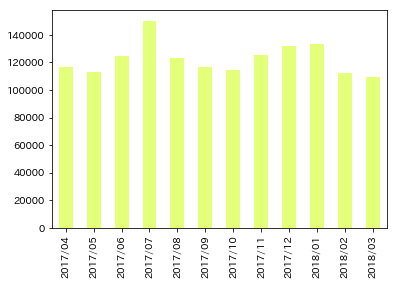

In [11]:
# 可視化（pandasを利用した場合）
"""
['受電 電力量']：可視化したい列の名称（ヘッダ）
kind='bar':棒グラフで表現
colormap='Wistia':色の選択（電力量なので黄色）
"""

vis_df_month['受電 電力量'].plot(kind='bar',colormap='Wistia')

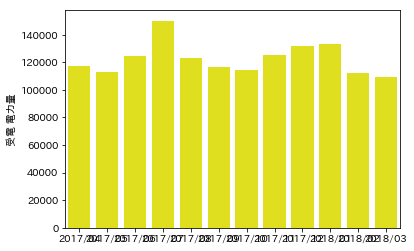

In [12]:
# 可視化（seabornを利用した場合）
"""
x=vis_df_month.index:pandasデータフレームのindex(x軸)
y = vis_df_month['受電 電力量']:可視化したい列の名称
color='blue'：色の選択
"""
sns.barplot(x=vis_df_month.index,y = vis_df_month['受電 電力量'],color='yellow')

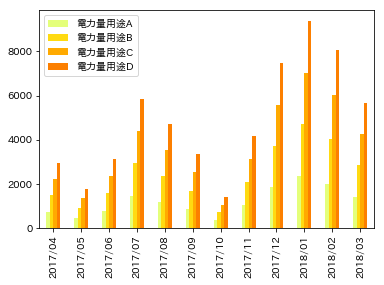

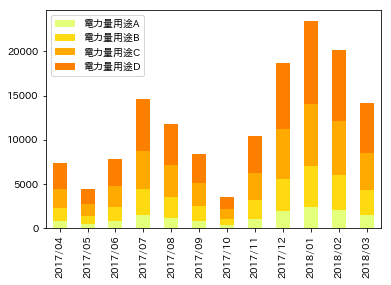

In [13]:
# 可視化（pandasを利用した場合）
'''
vis_df_month.columns.str.startswith('電力量用途')の文言は、
ヘッダ行を検索して、先頭文字列にシングルクォートで囲まれた文字列が含まれているものを
選択する処理を行っている。
'''
vis_df_month.loc[:,vis_df_month.columns.str.startswith('電力量用途')].plot(kind='bar',colormap='Wistia')

# 積み重ねる場合
'''
stacked: Trueにすると積み重ねることができる。
'''
vis_df_month.loc[:,vis_df_month.columns.str.startswith('電力量用途')].plot(stacked=True,kind='bar',colormap='Wistia')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C099F7D9B0>,
      dtype=object)

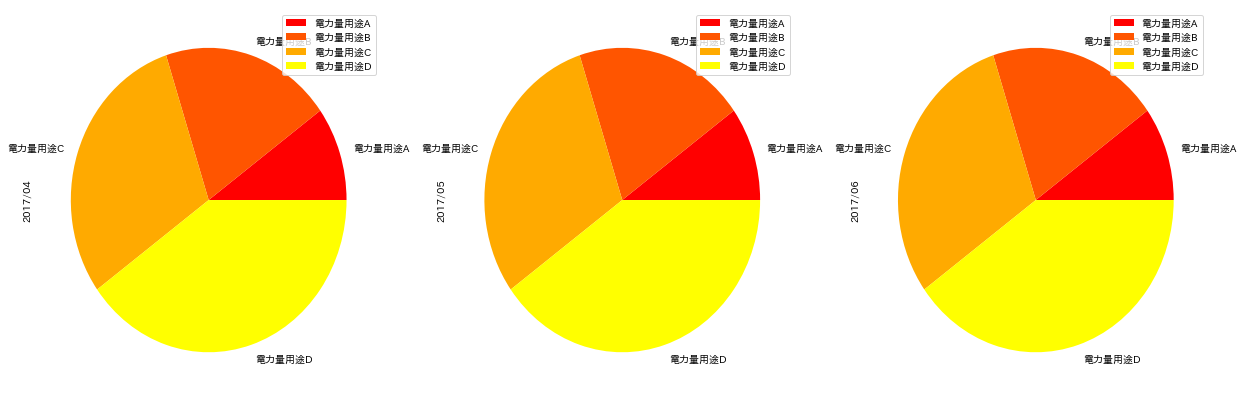

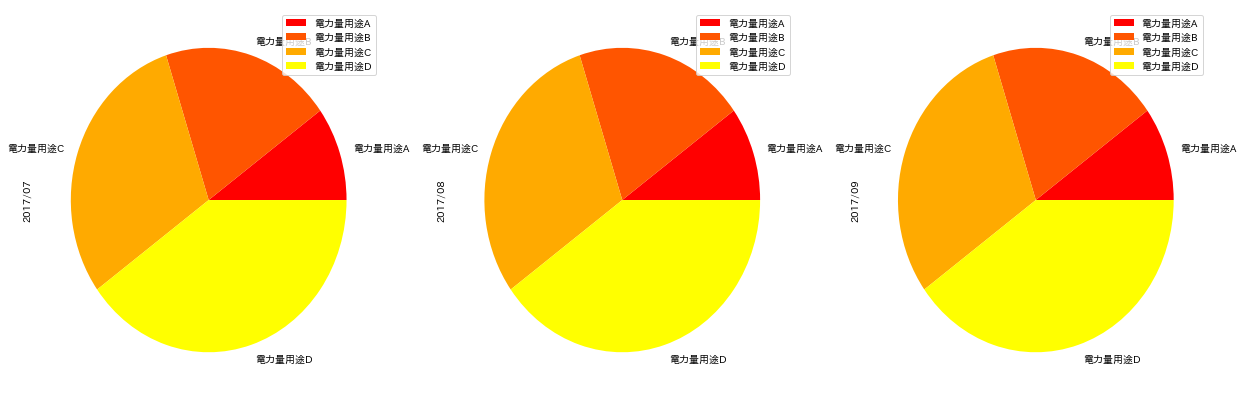

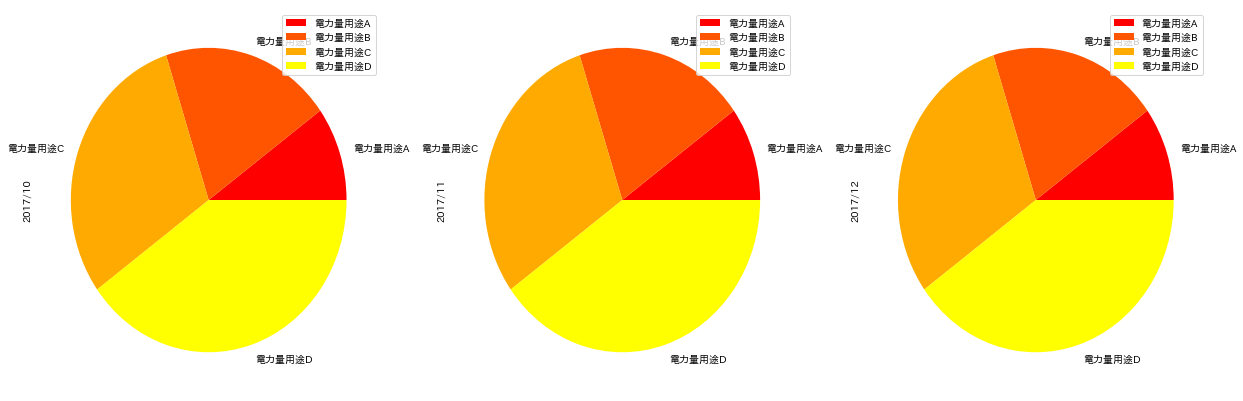

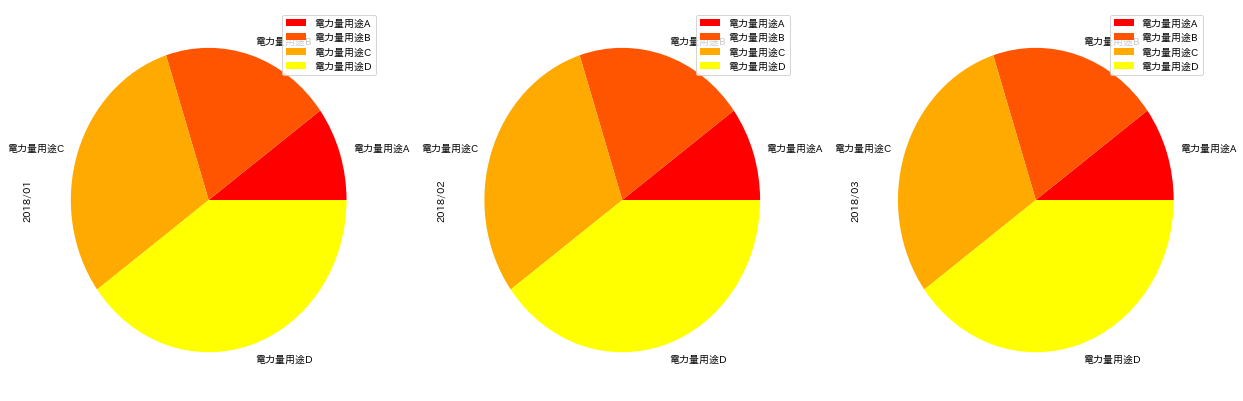

In [14]:
# 可視化（pandasを利用した場合）
'''
Pieチャートで月毎の利用用途の可視化
4行書いたのは見栄えのため。良い方法ある？
loc[]:可視化に必要な範囲（日付指定）
columns.str.startswith('電力量用途'):「電力量用途」を先頭一致でヘッダから検索し、一致したものを可視化
'''
vis_df_month.loc['2017/04':'2017/06',vis_df_month.columns.str.startswith('電力量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='autumn')
vis_df_month.loc['2017/07':'2017/09',vis_df_month.columns.str.startswith('電力量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='autumn')
vis_df_month.loc['2017/10':'2017/12',vis_df_month.columns.str.startswith('電力量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='autumn')
vis_df_month.loc['2018/01':'2018/03',vis_df_month.columns.str.startswith('電力量用途')].T.plot(kind='pie',figsize=(21,7),subplots=True,colormap='autumn')

C:\Users\yuuki\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\yuuki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\yuuki\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


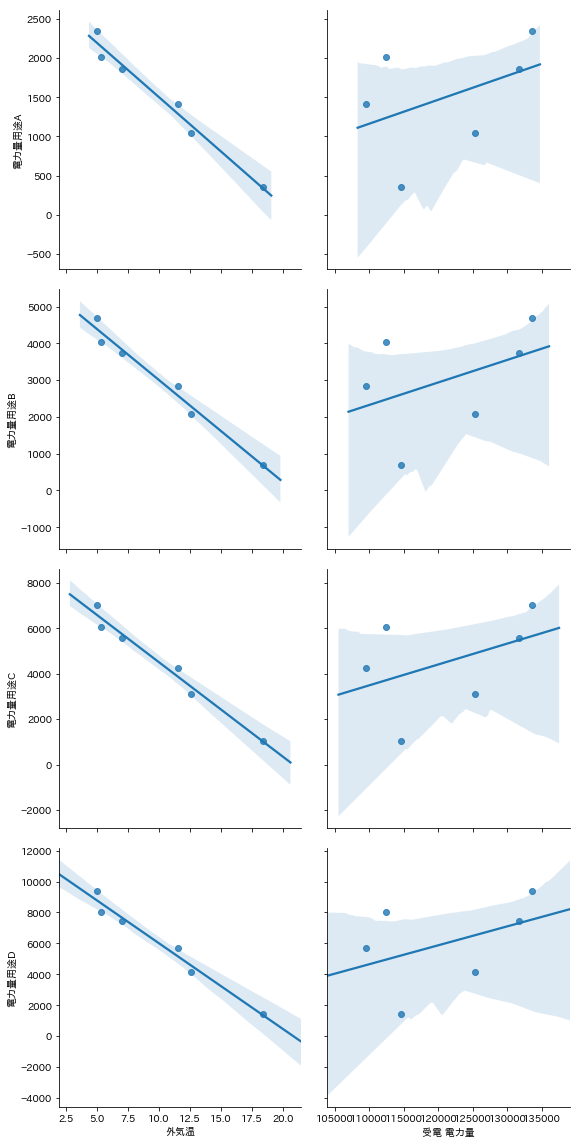

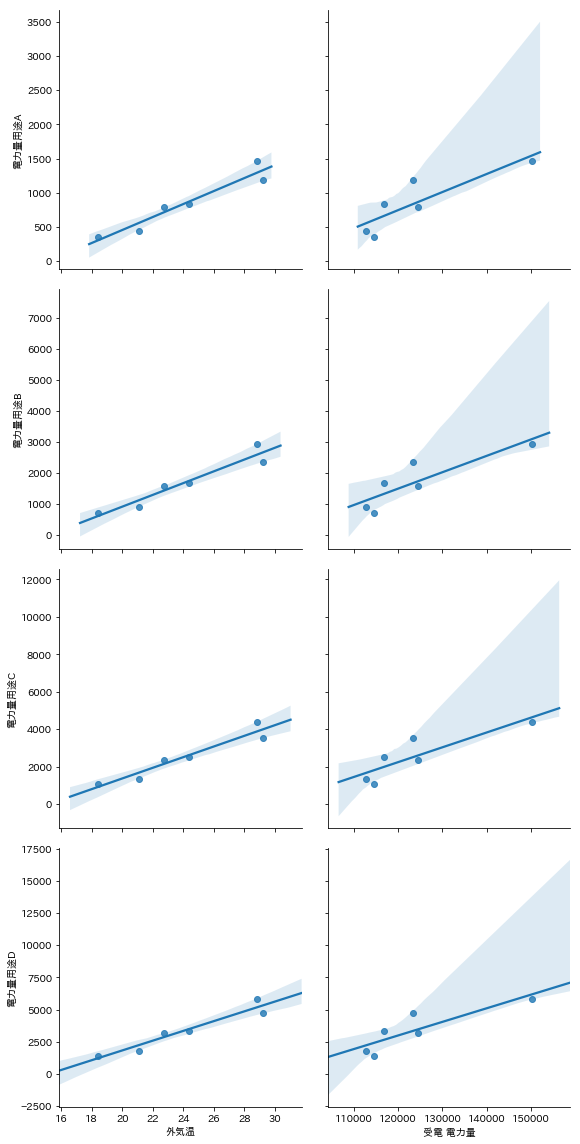

In [15]:
# 外気温度に対する電力量の相関,受電電力量に対する各用途の相関の確認
"""
 x_vars=['外気温','受電 電力量']：x軸にする列を指定
 y_vars=vis_df_month.columns[vis_df_month.columns.str.startswith('ガス量')]：y軸にする列を指定

"""
sns.pairplot(vis_df_month['2017/10':'2018/03'],
             x_vars=['外気温','受電 電力量'],
             y_vars=vis_df_month.columns[vis_df_month.columns.str.startswith('電力量')],
             kind = 'reg',
             size = 4,
            )
# 外気温度に対する電力量の相関,受電電力量に対する各用途の相関の確認
sns.pairplot(vis_df_month['2017/05':'2017/10'],
             x_vars=['外気温','受電 電力量'],
             y_vars=vis_df_month.columns[vis_df_month.columns.str.startswith('電力量')],
             kind = 'reg',
             size = 4,
            )

C:\Users\yuuki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\yuuki\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


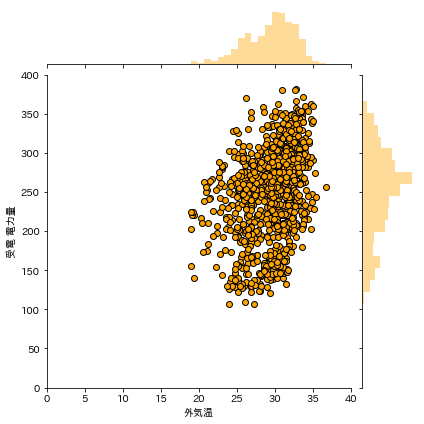

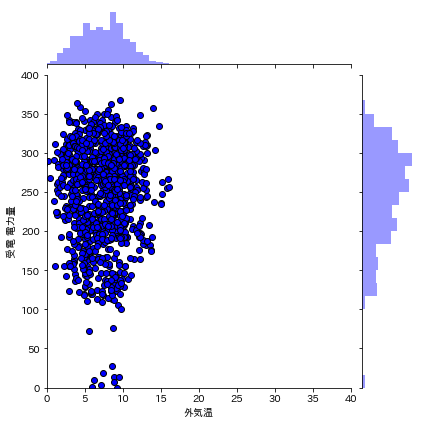

In [16]:
# 特定の相関関係を見るときに使用
# 同時にヒストグラムも表示
# 夏期
sns.jointplot(x = '外気温',# x軸の値を文字列で指定（データフレーム内のカラム名）
              y = '受電 電力量',# y軸の値を文字列で指定（データフレーム内のカラム名）
              # [(vis_df.index.hour >= 8) & (vis_df.index.hour <= 18)] : 8時から18時までのデータを使用
              # ['20170701':'20170930']:期間は、20170701から20170930までを使用
              data=vis_df[(vis_df.index.hour >= 8) & (vis_df.index.hour <= 18)]['20170701':'20170930'],
              kind='scatter',# グラフ種類を文字列で指定 
              color='orange', # plotの色を指定
              edgecolor='black', # plotの枠線の色を指定
              xlim=(0,40),# x軸の上下限値をタプルで入力
              ylim=(0,400),# y軸の上下限値をタプルで入力
             )

# 冬期
sns.jointplot(x = '外気温',# x軸の値を文字列で指定（データフレーム内のカラム名）
              y = '受電 電力量',# y軸の値を文字列で指定（データフレーム内のカラム名）
              # [(vis_df.index.hour >= 8) & (vis_df.index.hour <= 18)] : 8時から18時までのデータを使用
              # ['20171201':'20180228']:期間は、20171201から20180228までを使用
              data=vis_df[(vis_df.index.hour >= 8) & (vis_df.index.hour <= 18)]['20171201':'20180228'],
              kind='scatter',# グラフ種類を文字列で指定 
              color='blue', # plotの色を指定
              edgecolor='black', # plotの枠線の色を指定
              xlim=(0,40),# x軸の上下限値をタプルで入力
              ylim=(0,400),# y軸の上下限値をタプルで入力
             )

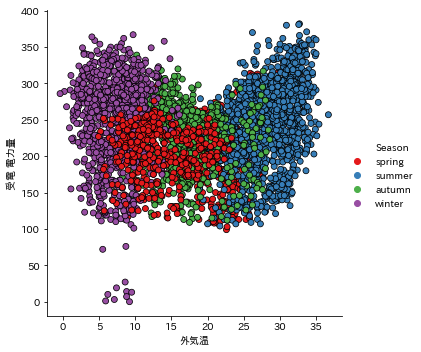

In [17]:
# Dataframeに夏と冬の属性を加える
#vis_dfにSeason列を追加して、それぞれ季節ごとのグラフにする。
"""
[(vis_df.index.month >= 3 ) & (vis_df.index.month <= 5 ),'Season'] ='spring': 3月から5月まではspringにする。
[(vis_df.index.month >= 12 ) | (vis_df.index.month <= 2 ),'Season'] ='winter'：年をまたぐので12月以上もしくは2月未満の月は冬と指定
"""
vis_df['Season'] = pd.Series()
vis_df.loc[(vis_df.index.month >= 3 ) & (vis_df.index.month <= 5 ),'Season'] ='spring'
vis_df.loc[(vis_df.index.month >= 6 ) & (vis_df.index.month <= 9 ),'Season'] ='summer'
vis_df.loc[(vis_df.index.month >= 10 ) & (vis_df.index.month <= 11 ),'Season'] ='autumn'
vis_df.loc[(vis_df.index.month >= 12 ) | (vis_df.index.month <= 2 ),'Season'] ='winter'

sns.relplot(x = '外気温',# x軸の値を文字列で指定（データフレーム内のカラム名）
            y = '受電 電力量',# y軸の値を文字列で指定（データフレーム内のカラム名）
            # [(vis_df.index.hour >= 8) & (vis_df.index.hour <= 18)] : 8時から18時までのデータを使用
            data=vis_df[(vis_df.index.hour >= 8) & (vis_df.index.hour <= 18)],
            kind='scatter',# グラフ種類を文字列で指定 
            palette='Set1', # plot群の色を指定
            edgecolor='black', # plotの枠線の色を指定
            hue='Season', #Season列のデータごとにplotを色分け
             )

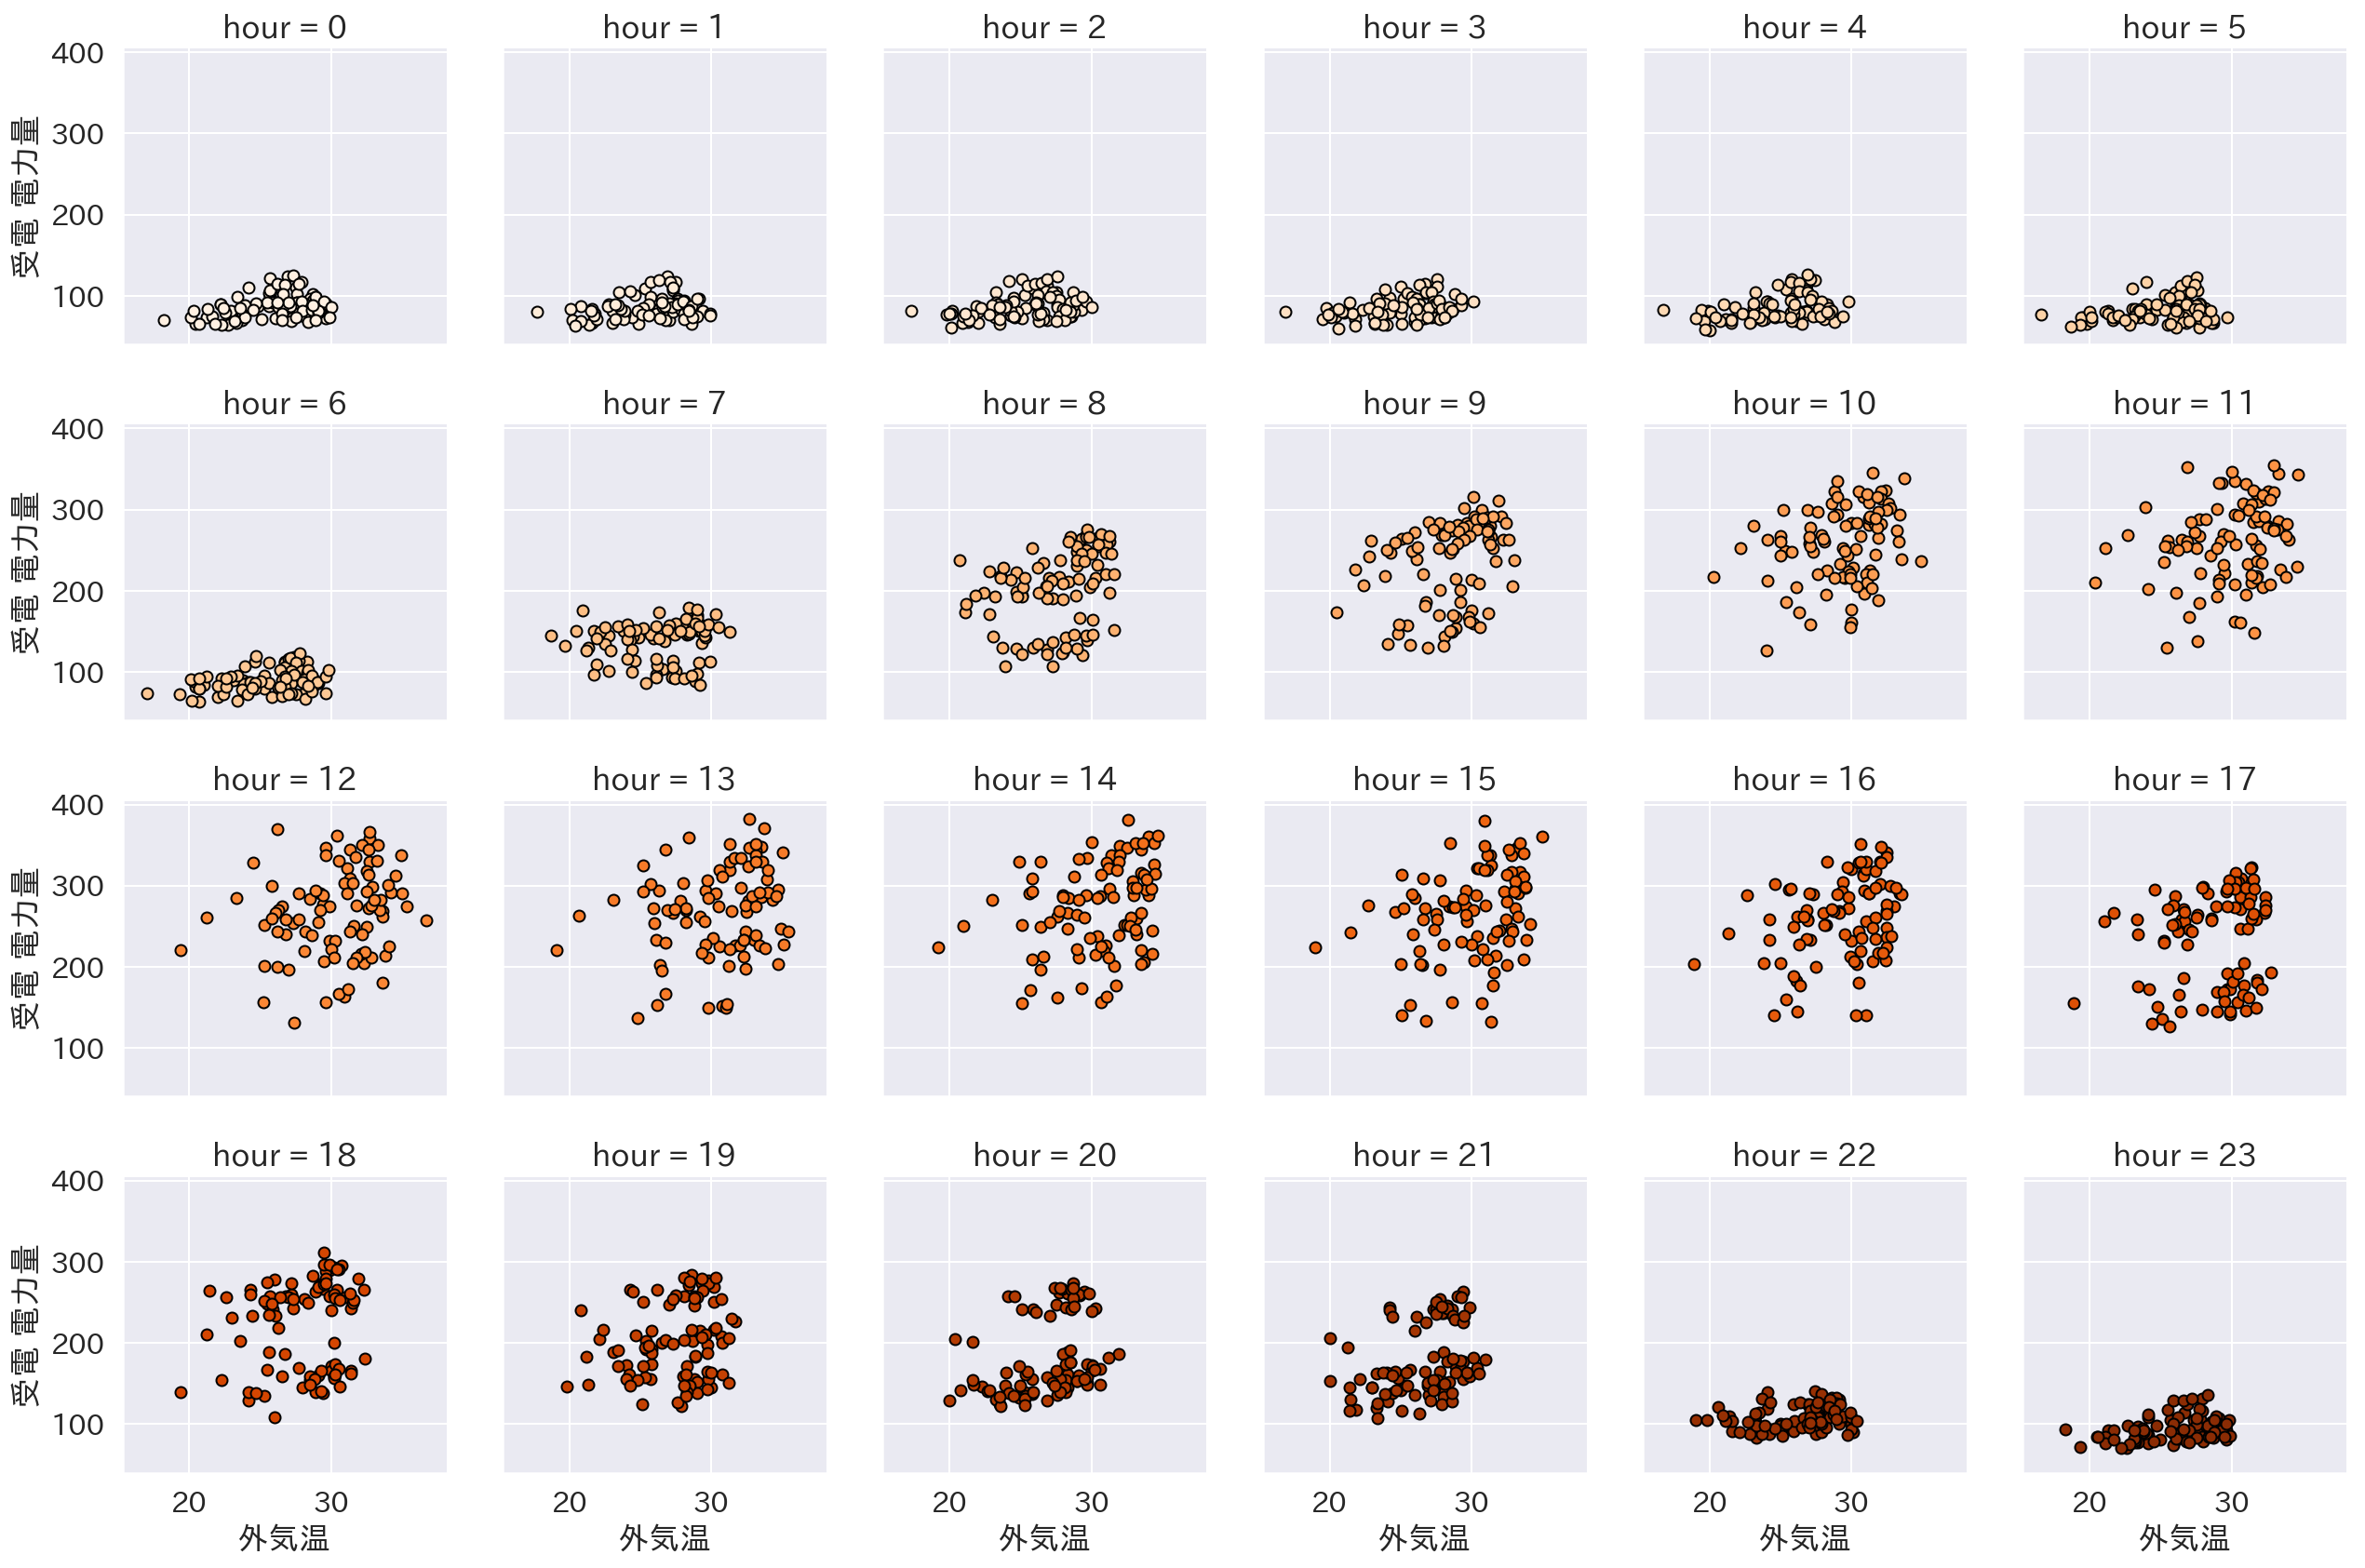

In [28]:
%config InlineBackend.figure_format ='retina' #きれいな画像にするおまじない
sns.set(font_scale=1.4)　　　　　　　　　　　 #文字サイズの決定
plt.rcParams['font.family'] = 'IPAPGothic'　　#日本語入力を可能にする
vis_df['hour'] = vis_df.index.hour　　　　　　#hour列を追加する
# 夏データ
grid = sns.FacetGrid(vis_df[(vis_df.index.month >= 7 ) & (vis_df.index.month <= 9 )],
                     sharex=True, 
                     col='hour', # グラフを何の列でわけるか
                     hue='hour', #hour毎に色を分ける
                     palette='Oranges',
                     col_wrap=6 # 何列でグラフをずらすか
                    )
grid.map(plt.scatter,'外気温',r'受電 電力量',edgecolors='black')